In [1]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga de datos
housing = fetch_california_housing()

In [3]:
# Creación de conjuntos de datos de entrenamiento, validación y prueba

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print('X_train', X_train.shape)
print('X_valid', X_valid.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_valid', y_valid.shape)
print('y_test', y_test.shape)

X_train (11610, 8)
X_valid (3870, 8)
X_test (5160, 8)
y_train (11610,)
y_valid (3870,)
y_test (5160,)


In [4]:
# Escalamiento de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
# Creación y compilación del modelo de la red neuronal:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])

In [6]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9325 - root_mean_squared_error: 0.9657 - mean_absolute_percentage_error: 39.9599 - val_loss: 0.6280 - val_root_mean_squared_error: 0.7925 - val_mean_absolute_percentage_error: 33.1804
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9346 - root_mean_squared_error: 0.9668 - mean_absolute_percentage_error: 33.8705 - val_loss: 0.5662 - val_root_mean_squared_error: 0.7525 - val_mean_absolute_percentage_error: 32.8615
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4966 - root_mean_squared_error: 0.7047 - mean_absolute_percentage_error: 29.9406 - val_loss: 0.4478 - val_root_mean_squared_error: 0.6692 - val_mean_absolute_percentage_error: 27.5302
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4448 - root_mean_squared_error: 0.6670 - mean_absolute_percentage_error: 28.0821 - val_loss: 0.4247 - val_root_mean_squared_error: 0.6517 - val_

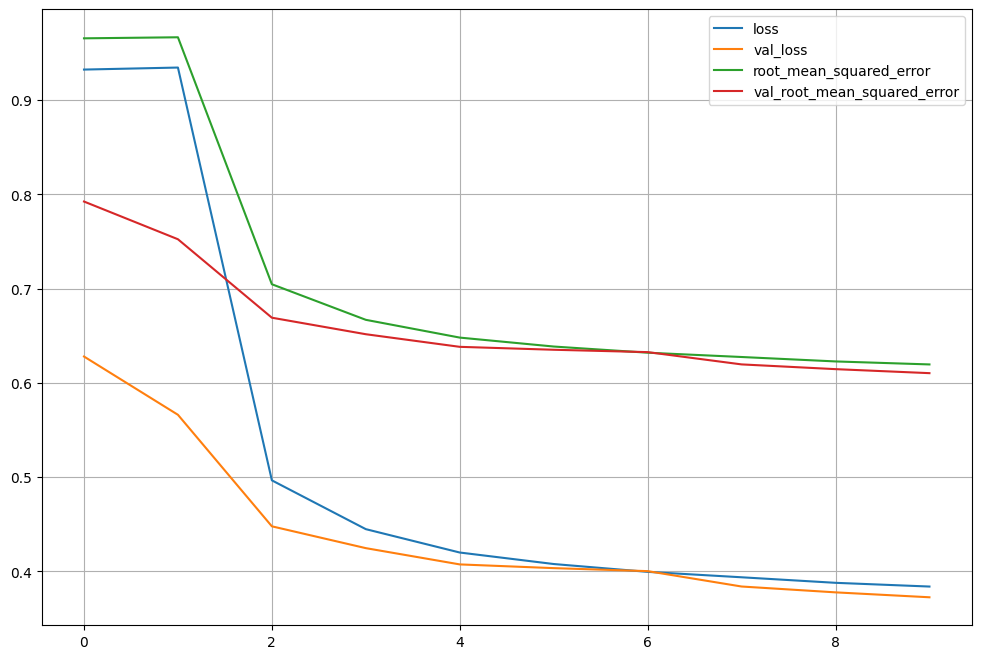

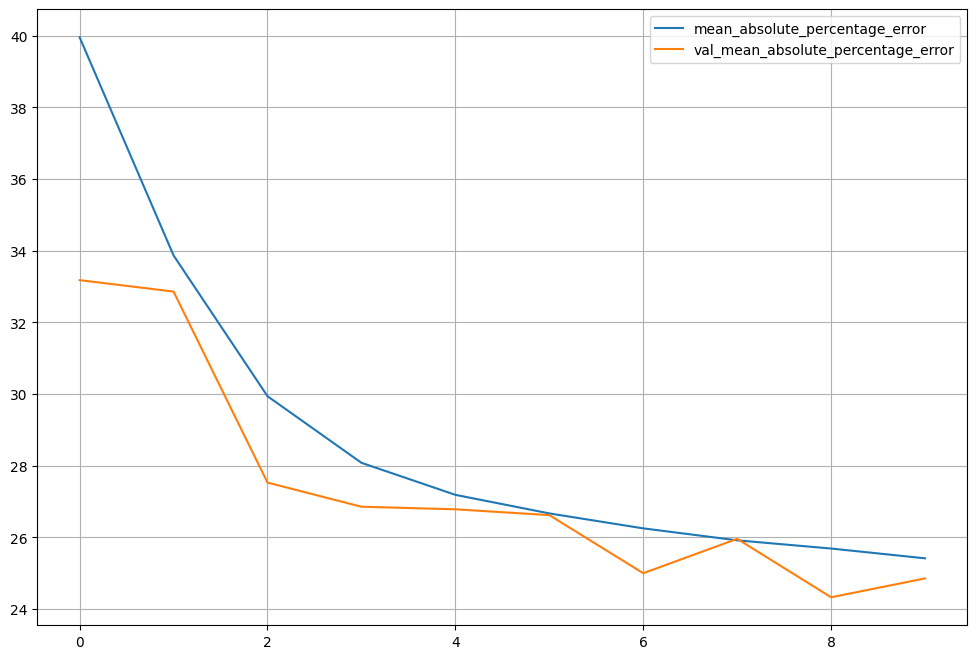

In [7]:
# Gráfico del historial del entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True, figsize=(12, 8))
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True, figsize=(12, 8))
plt.show()

In [8]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, rmse, mae = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train: ", loss)
print("rmse: ", rmse)
print("mae: ", mae)

# Evaluación del modelo en el conjunto de validación
loss, rmse, mae = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid: ", loss)
print("rmse: ", rmse)
print("mae: ", mae)

# Evaluación del modelo en el conjunto de prueba
loss, rmse, mae = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test: ", loss)
print("rmse: ", rmse)
print("mae: ", mae)

363/363 [==============================] - 0s 951us/step - loss: 0.3767 - root_mean_squared_error: 0.6138 - mean_absolute_percentage_error: 25.0747
Evaluar el modelo en el conjunto de entrenamiento
loss train:  0.3767493665218353
rmse:  0.6137991547584534
mae:  25.07469367980957
121/121 [==============================] - 0s 1ms/step - loss: 0.3725 - root_mean_squared_error: 0.6104 - mean_absolute_percentage_error: 24.8550
Evaluar el modelo en el conjunto de validación
loss valid:  0.3725373148918152
rmse:  0.6103583574295044
mae:  24.855022430419922
162/162 [==============================] - 0s 1ms/step - loss: 0.3805 - root_mean_squared_error: 0.6168 - mean_absolute_percentage_error: 24.3920
Evaluar el modelo en el conjunto de prueba
loss test:  0.3805030286312103
rmse:  0.6168493032455444
mae:  24.392005920410156
